In [33]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import copy
from numba import njit, prange
from concurrent.futures import ProcessPoolExecutor
import sys
import os
import fastlyp as flyp

In [ ]:
print(flyp.test)  # test module link

flyp says hi!


In [19]:
n_cores = os.cpu_count() - 1  # find cpu count, reserve 1 to reduce context-switching

In [ ]:
# initialize system states
r_init_ddp = np.array([flyp.phi_0, flyp.dphi_0], dtype=np.float64)
r_init_dp = np.array([flyp.theta1_0, flyp.theta2_0, flyp.dtheta1_0, flyp.dtheta2_0], dtype=np.float64)

# define constant arrays we vary systems over
gamma_arr = np.linspace(1., 1.1, 100)
theta1_0_arr = np.arange(0., np.pi, 0.017)

In [23]:
# make solution arrays
mLCE_lddp_arr = np.zeros(len(gamma_arr))
mLCE_qddp_arr = np.zeros(len(gamma_arr))
mLCE_dp_arr = np.zeros(len(theta1_0_arr))

In [ ]:
# calculate mLCEs for a range of constants w/ multiprocessing

if __name__ == "__main__":
    #__spec__ = "ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>)"

    with ProcessPoolExecutor(max_workers=n_cores) as executor1, \
         ProcessPoolExecutor(max_workers=n_cores) as executor2, \
         ProcessPoolExecutor(max_workers=n_cores) as executor3:
        results1 = list(executor1.map(flyp.mLCE_lddp, gamma_arr))
        results2 = list(executor2.map(flyp.mLCE_qddp, gamma_arr))
        results3 = list(executor3.map(flyp.mLCE_dp, theta1_0_arr))

In [ ]:
# run to save data in csv (for backup)
np.savetxt("lddp.csv", results1, delimiter=",", fmt="%.18e")
np.savetxt("dp.csv", results3, delimiter=",", fmt="%.18e")

# retrieve from with this code
data_lddp = np.loadtxt('lddp.csv', delimiter=',')
data_dp = np.loadtxt('dp.csv', delimiter=',')

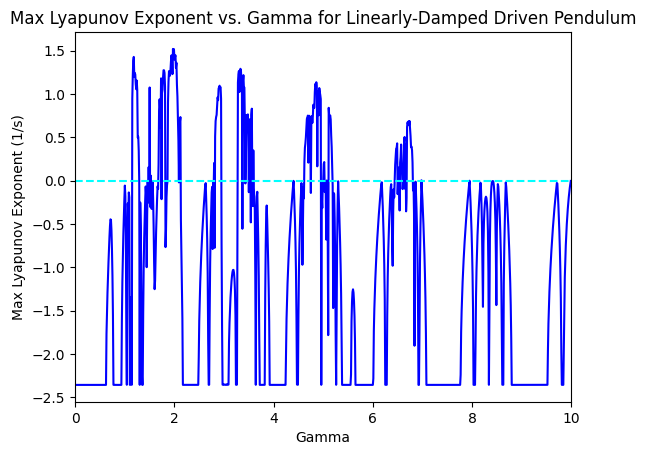

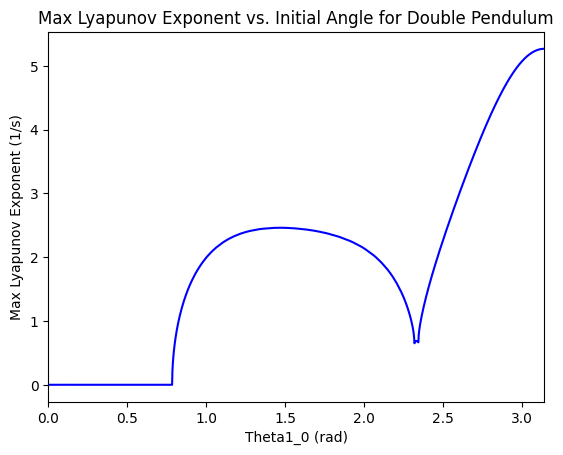

In [55]:
# plot lddp
fig, ax = plt.subplots()
gamma_arr_2 = np.arange(0., 10., 0.01)

ax.plot(gamma_arr_2, data_lddp, color = 'blue')
plt.axhline(y = 0, color = 'cyan', linestyle = '--')
ax.set_xlim(0, 10)
ax.set_xlabel('Gamma')
ax.set_ylabel('Max Lyapunov Exponent (1/s)')
ax.set_title('Max Lyapunov Exponent vs. Gamma for Linearly-Damped Driven Pendulum')

plt.show()

# plot dp
fig, ax = plt.subplots()
theta1_0_arr_2 = np.arange(0, np.pi, 0.001)

ax.plot(theta1_0_arr_2, data_dp, color = 'blue')
#plt.axhline(y = 0, color = 'cyan', linestyle = '--')

ax.set_xlim(0, np.pi)
ax.set_xlabel('Theta1_0 (rad)')
ax.set_ylabel('Max Lyapunov Exponent (1/s)')
ax.set_title('Max Lyapunov Exponent vs. Initial Angle for Double Pendulum')

plt.show()